In [1]:
import geopandas as gp
import pandas as pd
import glob
import json
import pylab as pl
import urllib2
import random

#Using the matplotlib customizing file
jsonFile = urllib2.urlopen('https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json')
s = json.load(jsonFile)
pl.rcParams.update(s)

%pylab inline

C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\ManushiM\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy


### Getting the Workforce Area Characteristics file for New York State

In [2]:
#Reading the Worforce Area Characteristics file for New York, for the year 2013
dfWac = pd.read_csv('ny_wac_S000_JT00_2013.csv')
dfWac.info()
print dfWac.head()

#datasource - http://lehd.ces.census.gov/data/lodes/LODES7/ny/wac/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104593 entries, 0 to 104592
Data columns (total 53 columns):
w_geocode     104593 non-null int64
C000          104593 non-null int64
CA01          104593 non-null int64
CA02          104593 non-null int64
CA03          104593 non-null int64
CE01          104593 non-null int64
CE02          104593 non-null int64
CE03          104593 non-null int64
CNS01         104593 non-null int64
CNS02         104593 non-null int64
CNS03         104593 non-null int64
CNS04         104593 non-null int64
CNS05         104593 non-null int64
CNS06         104593 non-null int64
CNS07         104593 non-null int64
CNS08         104593 non-null int64
CNS09         104593 non-null int64
CNS10         104593 non-null int64
CNS11         104593 non-null int64
CNS12         104593 non-null int64
CNS13         104593 non-null int64
CNS14         104593 non-null int64
CNS15         104593 non-null int64
CNS16         104593 non-null int64
CNS17         104593 non-

#### Description of necessary fields in WAC file
     CNS01          Number of jobs in NAICS sector 11 (Agriculture, Forestry, Fishing and Hunting) 
     CNS02          Number of jobs in NAICS sector 21 (Mining, Quarrying, and Oil and Gas Extraction) 
     CNS03          Number of jobs in NAICS sector 22 (Utilities) 
     CNS04          Number of jobs in NAICS sector 23 (Construction) 
     CNS05          Number of jobs in NAICS sector 31-33 (Manufacturing) 
     CNS06          Number of jobs in NAICS sector 42 (Wholesale Trade) 
     CNS07          Number of jobs in NAICS sector 44-45 (Retail Trade) 
     CNS08          Number of jobs in NAICS sector 48-49 (Transportation and Warehousing) 
     CNS09          Number of jobs in NAICS sector 51 (Information) 
     CNS10          Number of jobs in NAICS sector 52 (Finance and Insurance) 
     CNS11          Number of jobs in NAICS sector 53 (Real Estate and Rental and Leasing) 
     CNS12          Number of jobs in NAICS sector 54 (Professional, Scientific, and Technical Services) 
     CNS13          Number of jobs in NAICS sector 
     CNS14          Number of jobs in NAICS sector 56 (Administrative and Support and Waste 
     CNS15          Number of jobs in NAICS sector 61 (Educational Services) 
     CNS16          Number of jobs in NAICS sect
     CNS17          Number of jobs in NAICS sector
     CNS18          Number of jobs in NAICS sector 72 (Accommodation and Food Servic
     CNS19          Number of jobs in NAICS sector 81 (Other Services [except Public Administration]) 
     CNS20          Number of jobs in NAICS sector 92 (Public Administration) 
     CS01           Number of jobs for workers with Sex: Male
     CS02           Number of jobs for workers with Sex: Female

### Getting the Geographical Crosswalk file for New York State

In [3]:
#Reading the New York Geographical Crosswalk File for the year 2013
ny_xwalk = pd.read_csv('ny_xwalk.csv')
ny_xwalk.info()
ny_xwalk.head()

#datasource - http://lehd.ces.census.gov/data/lodes/LODES7/ny/wac/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350169 entries, 0 to 350168
Data columns (total 39 columns):
tabblk2010      350169 non-null int64
st              350169 non-null int64
stusps          350169 non-null object
stname          350169 non-null object
cty             350169 non-null int64
ctyname         350169 non-null object
trct            350169 non-null int64
trctname        350169 non-null object
bgrp            350169 non-null int64
bgrpname        350169 non-null object
cbsa            350169 non-null int64
cbsaname        317972 non-null object
zcta            350169 non-null int64
zctaname        347568 non-null float64
stplc           350169 non-null int64
stplcname       181826 non-null object
ctycsub         350169 non-null int64
ctycsubname     350077 non-null object
stcd114         350169 non-null int64
stcd114name     350169 non-null object
stsldl          350169 non-null int64
stsldlname      350169 non-null object
stsldu          350169 non-null int64
sts

C:\Users\ManushiM\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (27,28,29,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,tribname,tsub,tsubname,stanrc,stanrcname,mil,milname,stwib,stwibname,createdate
0,360010001001000,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,9999999,NaN,9999999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,20150603
1,360010001001001,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,9999999,NaN,9999999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,20150603
2,360010001001002,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,9999999,NaN,9999999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,20150603
3,360010001001003,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,9999999,NaN,9999999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,20150603
4,360010001001004,36,NY,New York,36001,"Albany County, NY",36001000100,"1 (Albany, NY)",360010001001,"1 (Tract 1, Albany, NY)",...,NaN,9999999,NaN,9999999,NaN,9999999999999999999999,NaN,36360051,Albany/Rensselaer/Schenectady LWIA,20150603


### Create NYC Crosswalk file from NY crosswalk file

In [4]:
#creating NYC crosswalk file from NY state crosswalk
nyc_xwalk = ny_xwalk.loc[ny_xwalk['stplcname'] == 'New York city, NY']
nyc_xwalk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39146 entries, 11002 to 240659
Data columns (total 39 columns):
tabblk2010      39146 non-null int64
st              39146 non-null int64
stusps          39146 non-null object
stname          39146 non-null object
cty             39146 non-null int64
ctyname         39146 non-null object
trct            39146 non-null int64
trctname        39146 non-null object
bgrp            39146 non-null int64
bgrpname        39146 non-null object
cbsa            39146 non-null int64
cbsaname        39146 non-null object
zcta            39146 non-null int64
zctaname        38604 non-null float64
stplc           39146 non-null int64
stplcname       39146 non-null object
ctycsub         39146 non-null int64
ctycsubname     39146 non-null object
stcd114         39146 non-null int64
stcd114name     39146 non-null object
stsldl          39146 non-null int64
stsldlname      39146 non-null object
stsldu          39146 non-null int64
stslduname      39146 n

### Get Workforce area characteristics for census blocks in New York City

In [5]:
#Merging the New York City geographical crosswalk file with the WAC file to 
wac_nyc = pd.merge(nyc_xwalk, dfWac, left_on='tabblk2010', right_on='w_geocode')
print wac_nyc.info()
print len(wac_nyc['tabblk2010'].unique())
print wac_nyc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23770 entries, 0 to 23769
Data columns (total 92 columns):
tabblk2010      23770 non-null int64
st              23770 non-null int64
stusps          23770 non-null object
stname          23770 non-null object
cty             23770 non-null int64
ctyname         23770 non-null object
trct            23770 non-null int64
trctname        23770 non-null object
bgrp            23770 non-null int64
bgrpname        23770 non-null object
cbsa            23770 non-null int64
cbsaname        23770 non-null object
zcta            23770 non-null int64
zctaname        23751 non-null float64
stplc           23770 non-null int64
stplcname       23770 non-null object
ctycsub         23770 non-null int64
ctycsubname     23770 non-null object
stcd114         23770 non-null int64
stcd114name     23770 non-null object
stsldl          23770 non-null int64
stsldlname      23770 non-null object
stsldu          23770 non-null int64
stslduname      23770 non-nu

### We are grouping all blocks that fall under a particular zip code together, and taking a sum of employees for each industry type and gender corresponding to the Zip Code

In [6]:
group = wac_nyc.groupby('zcta')

wac_nyc_zip = group[['C000', 'CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08', 'CNS09', 'CNS10', 
                     'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16', 'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CS01', 
                     'CS02']].agg(np.sum)

wac_nyc_zip = wac_nyc_zip.reset_index()
wac_nyc_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 24 columns):
zcta     214 non-null int64
C000     214 non-null int64
CNS01    214 non-null int64
CNS02    214 non-null int64
CNS03    214 non-null int64
CNS04    214 non-null int64
CNS05    214 non-null int64
CNS06    214 non-null int64
CNS07    214 non-null int64
CNS08    214 non-null int64
CNS09    214 non-null int64
CNS10    214 non-null int64
CNS11    214 non-null int64
CNS12    214 non-null int64
CNS13    214 non-null int64
CNS14    214 non-null int64
CNS15    214 non-null int64
CNS16    214 non-null int64
CNS17    214 non-null int64
CNS18    214 non-null int64
CNS19    214 non-null int64
CNS20    214 non-null int64
CS01     214 non-null int64
CS02     214 non-null int64
dtypes: int64(24)
memory usage: 41.8 KB


### We are interested in only those industries that have employee count more than 100,000. We do it as follows

In [7]:
#Creating data frame for only industries
nycIndustries = wac_nyc_zip[['C000', 'CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08', 'CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16', 'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CS01', 'CS02']]


#Get the industries with employees greater than 100,000
sumWac = nycIndustries.sum()
print sumWac.sort(axis=0, ascending = False, inplace = False)

C000     3920262
CS01     1969961
CS02     1950301
CNS16     643962
CNS12     364406
CNS15     358273
CNS07     339831
CNS10     324421
CNS18     302605
CNS14     222920
CNS20     198531
CNS09     195381
CNS08     160354
CNS19     159729
CNS06     145067
CNS11     134456
CNS04     118145
CNS17      89536
CNS05      76484
CNS13      69082
CNS03      16744
CNS01        277
CNS02         58
dtype: int64


C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


### Creating a dataframe with those specific industries

In [8]:
wacNyc_Industries = wac_nyc_zip[['zcta', 'CNS16', 'CNS12', 'CNS15', 'CNS07', 'CNS10', 'CNS18', 'CNS14', 'CNS20', 'CNS09', 'CNS08', 'CNS19', 'CNS06', 'CNS11', 'CNS04', 'CS01', 'CS02']]
wacNyc_Industries.info()
wacNyc_Industries.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 17 columns):
zcta     214 non-null int64
CNS16    214 non-null int64
CNS12    214 non-null int64
CNS15    214 non-null int64
CNS07    214 non-null int64
CNS10    214 non-null int64
CNS18    214 non-null int64
CNS14    214 non-null int64
CNS20    214 non-null int64
CNS09    214 non-null int64
CNS08    214 non-null int64
CNS19    214 non-null int64
CNS06    214 non-null int64
CNS11    214 non-null int64
CNS04    214 non-null int64
CS01     214 non-null int64
CS02     214 non-null int64
dtypes: int64(17)
memory usage: 30.1 KB


,zcta,CNS16,CNS12,CNS15,CNS07,CNS10,CNS18,CNS14,CNS20,CNS09,CNS08,CNS19,CNS06,CNS11,CNS04,CS01,CS02
0,10001,24425,24437,5335,19882,6228,10917,14140,1458,13766,1156,5349,12487,6526,4086,80031,83694
1,10002,3333,785,750,3233,329,4732,623,52,451,165,919,827,873,693,9985,9190
2,10003,7311,10390,18312,10016,1058,12292,3313,812,4867,118,2656,1370,2538,588,45706,43635
3,10004,5151,11341,887,1317,20047,1678,3244,6487,3096,332,2451,388,903,933,29756,30210
4,10005,4664,9239,439,375,23941,1118,2297,1428,1977,132,1231,240,1024,624,28419,23456


### Generating ratio of count of male employees to female employees

In [9]:
wacNyc_Industries['RatioMF'] = wacNyc_Industries['CS01'] / wacNyc_Industries['CS02']

C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
#Checking correlation between the ratio to count of empoyees in each industry
correlationMatrix = wacNyc_Industries.corr()
correlationMatrix[17:]

,zcta,CNS16,CNS12,CNS15,CNS07,CNS10,CNS18,CNS14,CNS20,CNS09,CNS08,CNS19,CNS06,CNS11,CNS04,CS01,CS02,RatioMF
RatioMF,-0.010482,-0.387209,0.012608,-0.02869,-0.061367,0.060048,-0.003728,0.042077,-0.045709,0.029099,0.113343,-0.0784,0.156326,-0.054209,0.293685,0.026632,-0.078542,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000118E41D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002FB514E0>]], dtype=object)

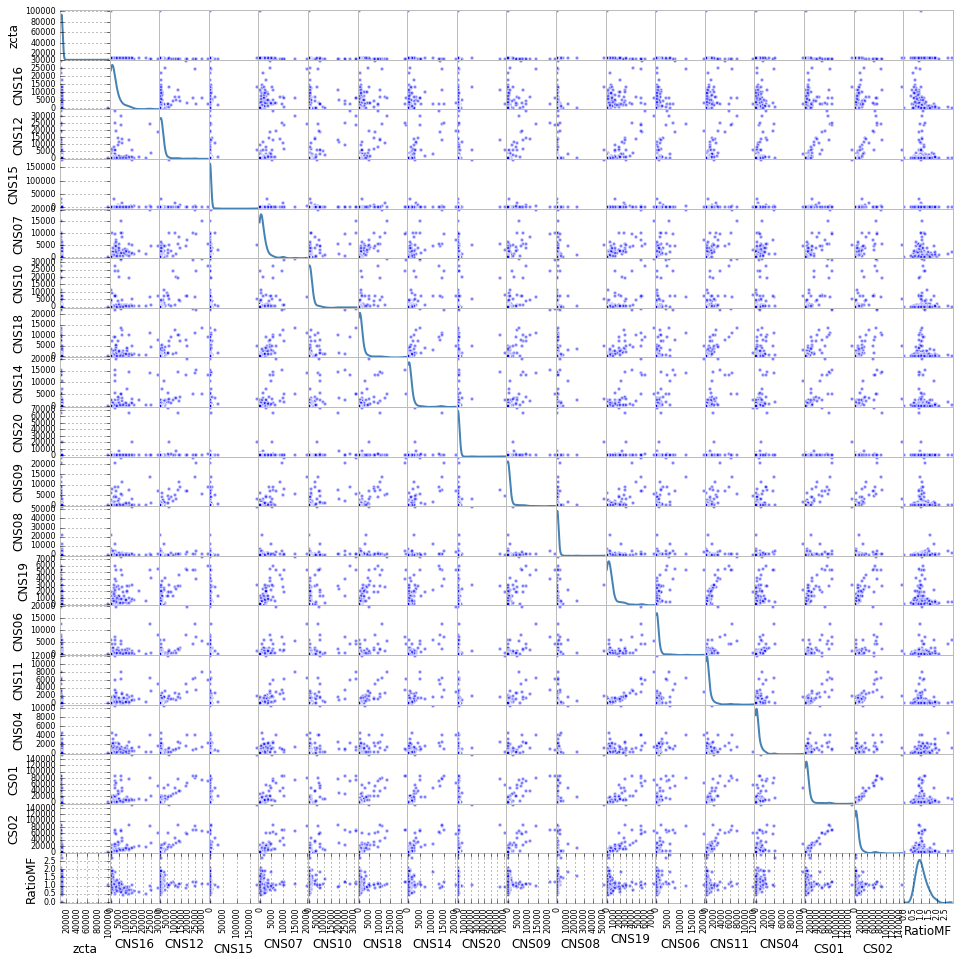

In [11]:
#Plotting scatter matrix
from pandas.tools.plotting import scatter_matrix
scatter_matrix(wacNyc_Industries, s=50, figsize=(16, 16), diagonal='kde')

### Based on the Scatter Matrix and Correlation ocefficients obtained for the ratio of number of Male to Female Employees and Number of Employees per Industry, the observations are as follows:

- Correlation between CNS16 and Ratio (-0.387209), indicating a greater number of women in CNS16.

- Correlation between CNS12 and Ratio (0.012608), indicating a greater number of men in CNS12.

- Correlation between CNS18 and Ratio (-0.003728), indicating a greater number of women in CNS18.

- Correlation between CNS19 and Ratio (-0.078400), indicating a greater number of women in CNS19.

### Creating a dataframe of the selected industries and count of male and female employees, and calculating ratio of male and female employees

In [12]:
total_industries = wacNyc_Industries[['CNS08', 'CNS10','CNS12', 'CNS15', 'CNS16', 'CNS07', 'CNS18', 'CNS19', 'CNS04', 'CNS11','CNS06', 'CNS14', 'CNS20', 'CNS09', 'CS01', 'CS02']]
total_industries['RatioMF'] = total_industries['CS01'] / total_industries['CS02']
total_industries = total_industries.drop(['CS01','CS02'], axis=1)

C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
#Normalising the data
total_industries1 = (total_industries - total_industries.mean()) / total_industries.std()
total_industries_array = total_industries1.as_matrix()
print total_industries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 15 columns):
CNS08      214 non-null int64
CNS10      214 non-null int64
CNS12      214 non-null int64
CNS15      214 non-null int64
CNS16      214 non-null int64
CNS07      214 non-null int64
CNS18      214 non-null int64
CNS19      214 non-null int64
CNS04      214 non-null int64
CNS11      214 non-null int64
CNS06      214 non-null int64
CNS14      214 non-null int64
CNS20      214 non-null int64
CNS09      214 non-null int64
RatioMF    214 non-null float64
dtypes: float64(1), int64(14)
memory usage: 26.8 KB
None


### CLUSTERING

In [14]:
random.seed(222)

from sklearn.cluster import KMeans

result = KMeans(n_clusters=6)
result.fit(total_industries_array)

print result.labels_
labels = result.labels_
total_industries['labelsT'] = labels

wacNyc_Industries['labelsT'] = labels

[1 0 0 0 0 5 3 5 0 0 0 3 0 1 4 1 4 5 0 4 0 0 0 5 0 0 0 5 5 0 5 5 0 4 5 0 5
 5 5 0 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0
 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 0 5 0 5 5 5 0 5 5 5 5 5 5 5 5 5 0 5 5
 1 5 5 5 5 5 5 2 5 5 5 5 5 5 0 5 0 5 5 5 0 5 0 0 0 0 5 5 5 5 5 5 5 0 0 5 5
 5 0 0 5 5 5 5 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 0 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5]


C:\Users\ManushiM\Anaconda\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
subset_final = wacNyc_Industries[['zcta', 'labelsT']]
subset_final['labelsT'].unique()

array([1, 0, 5, 3, 4, 2], dtype=int64)

In [16]:
#Reading the NYC ZIP codes geojson shapefile
zipCodes = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zipCodes['postalCode'] = zipCodes['postalCode'].astype(int)
zipCodes.info()

#datasource - http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 12 columns):
@id               262 non-null object
BLDGpostalCode    262 non-null int64
CTY_FIPS          262 non-null object
OBJECTID          262 non-null int64
PO_NAME           262 non-null object
STATE             262 non-null object
ST_FIPS           262 non-null object
Shape_Area        262 non-null float64
Shape_Leng        262 non-null float64
borough           262 non-null object
geometry          262 non-null object
postalCode        262 non-null int32
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 25.6+ KB


In [17]:
clusteredDf = pd.merge(zipCodes,subset_final, left_on='postalCode', right_on ='zcta')

In [18]:
clusteredDf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 14 columns):
@id               220 non-null object
BLDGpostalCode    220 non-null int64
CTY_FIPS          220 non-null object
OBJECTID          220 non-null int64
PO_NAME           220 non-null object
STATE             220 non-null object
ST_FIPS           220 non-null object
Shape_Area        220 non-null float64
Shape_Leng        220 non-null float64
borough           220 non-null object
geometry          220 non-null object
postalCode        220 non-null int32
zcta              220 non-null int64
labelsT           220 non-null int32
dtypes: float64(2), int32(2), int64(3), object(7)
memory usage: 24.1+ KB


In [19]:
total = total_industries.groupby('labelsT').describe()
#total.to_csv('clusters.csv')
#print total

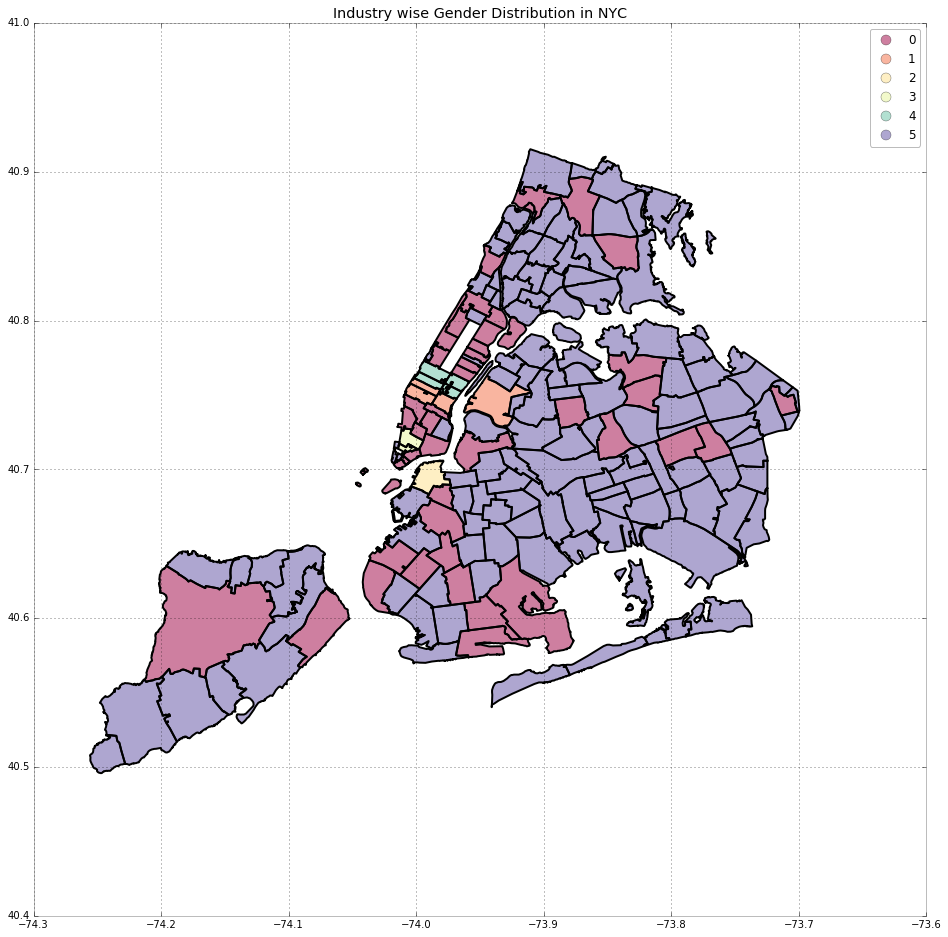

In [20]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

figure, ax = pl.subplots(figsize=(16,16))
clusteredDf.plot(axes=ax, column='labelsT', legend=True, categorical=True, colormap=cmap)
ax.set_title('Industry wise Gender Distribution in NYC')

In [21]:
clusterDescribe = total_industries.groupby('labelsT').describe()
clusterDescribe.to_csv('clustersDescribe.csv')
clusterDescribe

CNS04         CNS06         CNS07         CNS08  \
labelsT                                                                 
0       count     43.000000     43.000000     43.000000     43.000000   
        mean     618.581395    579.581395   2981.209302    322.651163   
        std      492.890562    614.986420   2243.881836    419.869531   
        min       65.000000     18.000000    317.000000      8.000000   
        25%      298.500000    158.500000   1655.500000     78.000000   
        50%      441.000000    302.000000   2527.000000    133.000000   
        75%      854.000000    733.000000   3374.000000    343.500000   
        max     2233.000000   2605.000000  10158.000000   1412.000000   
1       count      4.000000      4.000000      4.000000      4.000000   
        mean    5003.750000  11432.750000   9040.750000   4238.500000   
        std     3820.273147   6207.151326   7319.389108   5375.996063   
        min     1550.000000   5688.000000   4598.000000    480.000000   
        25%     3323.000000   7303.500000   4615.250000    987.000000   
        50%     4000.000000  10164.500000   5841.500000   2180.500000   
        75%     5680.750000  14293.750000  10267.000000   5432.000000   
        max    10465.000000  19714.000000  19882.000000  12113.000000   
2       count      1.000000      1.000000      1.000000      1.000000   
        mean    1189.000000   1213.000000   5128.000000  52180.000000   
        std             NaN           NaN           NaN           NaN   
        min     1189.000000   1213.000000   5128.000000  52180.000000   
        25%     1189.000000   1213.000000   5128.000000  52180.000000   
        50%     1189.000000   1213.000000   5128.000000  52180.000000   
        75%     1189.000000   1213.000000   5128.000000  52180.000000   
        max     1189.000000   1213.000000   5128.000000  52180.000000   
3       count      2.000000      2.000000      2.000000      2.000000   
        mean    1392.000000   1153.000000   4280.000000    187.500000   
        std     1609.375034   1076.216521   2020.911181     38.890873   
        min      254.000000    392.000000   2851.000000    160.000000   
        25%      823.000000    772.500000   3565.500000    173.750000   
        50%     1392.000000   1153.000000   4280.000000    187.500000   
        75%     1961.000000   1533.500000   4994.500000    201.250000   
        max     2530.000000   1914.000000   5709.000000    215.000000   
4       count      4.000000      4.000000      4.000000      4.000000   
        mean    1337.000000   5190.250000  10139.000000   1499.250000   
        std      674.509698   1422.563033   3895.476094   1427.115593   
        min      768.000000   3986.000000   5635.000000    408.000000   
        25%      881.250000   4211.750000   8611.750000    770.250000   
        50%     1157.000000   4820.500000   9893.500000    997.000000   
        75%     1612.750000   5799.000000  11420.750000   1726.000000   
        max     2266.000000   7134.000000  15134.000000   3595.000000   
5       count    160.000000    160.000000    160.000000    160.000000   
        mean     388.812500    313.337500    757.700000    443.587500   
        std      591.009063    672.946687    722.197875   1845.725606   
        min        0.000000      0.000000      0.000000      0.000000   
        25%       50.000000     30.750000    177.000000     11.500000   
        50%      179.000000    102.000000    614.500000     64.000000   
        75%      492.500000    318.000000   1095.750000    239.250000   
        max     4376.000000   5781.000000   3723.000000  21633.000000   

                      CNS09         CNS10         CNS11         CNS12  \
labelsT                                                                 
0       count     43.000000     43.000000     43.000000     43.000000   
        mean    1374.348837   1795.930233   1002.232558   2409.534884   
        std     2498.159331   4721.601597    753.398327   3783.678126   
      

## RESULTS:

- Based on the 'RatioMF' mean values for each cluster, Cluster 0(0.82843) and Cluster 5(0.897102) indicate more Women than men in those areas.


- For Cluster 0, the Correlation is comparatively very high for industry CNS16, indicating a greater employees, mostly women, in Health Care and Social Assistance. For Cluster 5, a large number of women employees seem to be working in CNS20 (Public Administration) and CNS10 (Finance and Insurance). These clusters seem to be spread all over the City, and in midtown Manhattan (Finance and Insurance).


- For the remaining clusters, the ratio of number of men to women indicates more number of men. These men seem to be concentrated in industries CNS10 (Finance and Insurance), CNS12 (Professional, Scientific and Technical services), CNS15 (Educational Services), CNS16 (Health Care and Social Assistance). Downtown Brooklyn seems to be focused more on Educational Services. Parts of Downtown Manhattan seem to be centered on Professional, Scientific and Technical services, as well as Health Care and social Assistance.